# Analiza Danych (EDA) - Telco Customer Churn
**Cel:** Zidentyfikowanie głównych przyczyn odejść klientów (Churn) przed budową modelu ML.
**Zbiór danych:** Telco Customer Churn (Kaggle).

## 1. Wczytanie i Czyszczenie Danych
Pierwszy krok to weryfikacja typów danych. Zauważono, że kolumna `TotalCharges` jest błędnie interpretowana jako tekst z powodu pustych spacji.

In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [128]:
#Wczytanie
df = pd.read_csv("Telco-Customer-Churn.csv")

df.describe(include='all')

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043,7043
unique,7043,2,NaN,2,2,NaN,2,3,3,3,3,3,3,3,3,3,2,4,NaN,6531,2
top,7590-VHVEG,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,20.2,No
freq,1,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,NaN,11,5174
mean,NaN,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,NaN,NaN
std,NaN,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN,NaN
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,NaN,NaN
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN,NaN
75%,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN,NaN


In [129]:
pd.set_option('display.max_columns', None)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [130]:
#Naprawa TotalCharges
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")
#Usuwamy id klienta - jest niepotrzebne w analizie
df.drop(columns = ["customerID"], inplace=True)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Sprzątanie "ukrytych duplikatów" 
**"No phone service"** to to samo co "No".

**"No internet service"** to to samo co "No".

In [131]:
replace_dict = {
    "No internet service": "No",
    "No phone service": "No"
}

cols_to_fix = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
    'TechSupport', 'StreamingTV', 'StreamingMovies', 
    'MultipleLines']

for col in cols_to_fix:
    df[col] = df[col].replace(replace_dict)

df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Binary encoding

In [132]:
binary_cols = cols_to_fix + ['gender','Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']
#Zamiana Yes/No na 1/0
for col in binary_cols:
    df[col] = df[col].map({"Yes": 1, "No": 0, "Male": 1, "Female": 0})


# Onehot Encoding

In [133]:
# Zostają nam: InternetService, Contract, PaymentMethod.
# drop_first=True usuwa jedną kolumnę, żeby uniknąć pułapki "dummy variable trap".
df = pd.get_dummies(df, columns=["InternetService", "Contract", "PaymentMethod"], drop_first=True)

# Zamiana True/False na 1/0 (czasami pandas zwraca bool)
df = df.astype(float)

df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,29.85,29.85,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,34.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,56.95,1889.50,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,1.0,0.0,0.0,0.0,2.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,53.85,108.15,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,45.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,42.30,1840.75,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,70.70,151.65,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


# Sprawdzenie współliniowości

<Axes: >

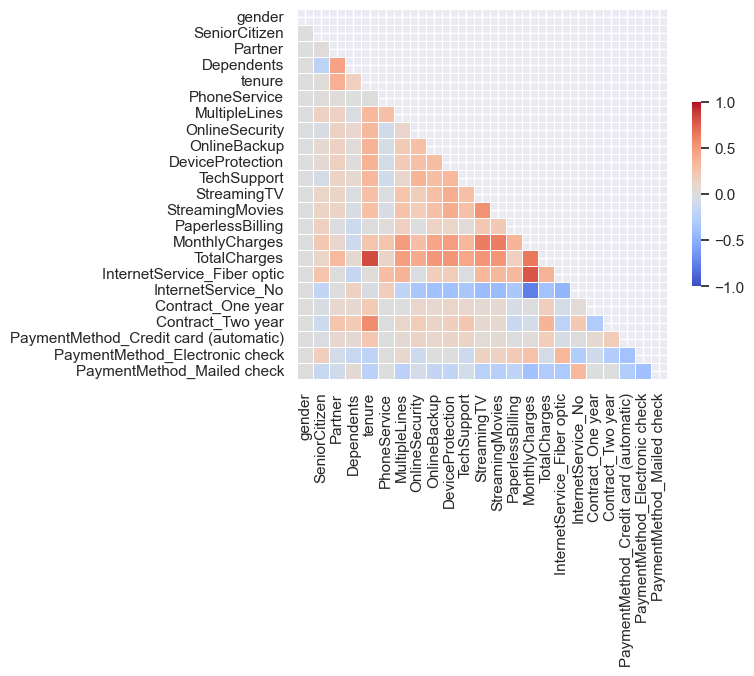

In [134]:
X_corr = df.drop(columns=["Churn"])

#tworzymy macierz korelacji
corr_matrix = X_corr.corr()

#Maska trójkątna żeby dane się nie powielały po drugiej stronie przekątnej
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

sns.heatmap(corr_matrix, mask=mask, cmap="coolwarm", vmax=1, vmin=-1,center=0, square=True, linewidths=.5, cbar_kws={"shrink":.5})

In [135]:
#Jak widać na powyższej heatmapie TotalCharges, MonthlyCharges i tenure są silnie od siebie zależne wynika to z faktu że TotalCharges = MontlyCharges * tenure
#Widać także silną zależność między InternetService_Fiber optic i MonthlyCharges ale zostawiamy to z powodu sensu biznesowego
#Do Uczenia maszynowego użyje jednego z modeli drzewowych, na które za bardzo nie ma wpływu współliniowość

# Usuwamy TYLKO TotalCharges, bo to matematyczny duplikat (Monthly * tenure)
if "TotalCharges" in df.columns:
    df.drop(columns=["TotalCharges"], inplace= True)

# Obliczenie i Wizualizacja Korelacji

In [136]:
# 1. Obliczamy korelację każdej kolumny ze zmienną 'Churn'
# sort_values() układa je od największej do najmniejszej
correlation = df.corr()["Churn"].sort_values(ascending=False).drop("Churn")


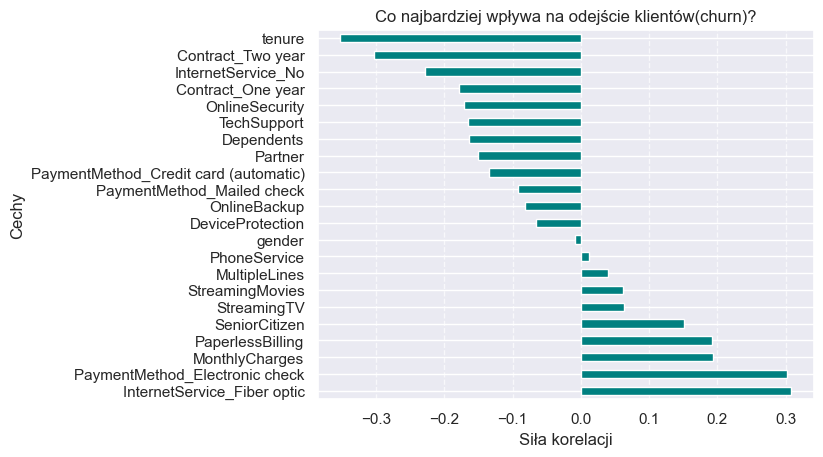

In [137]:
correlation.plot(kind='barh', color='teal')
plt.title("Co najbardziej wpływa na odejście klientów(churn)?")
plt.xlabel("Siła korelacji")
plt.ylabel("Cechy")
plt.grid(axis = "x", linestyle='--', alpha=0.7)
plt.show()
# Im więcej tym bardziej powoduje odejście klienta (wpływa negatywnie)

# Zapis Przetworzonych Danych

In [138]:
df.to_csv("telco_churn_processed.csv", index=False)

## **Machine Learning**

In [139]:
#Sprawdzenie równowagi danych
churn_counts = df['Churn'].value_counts()
print("Liczebnosc klas")
print(churn_counts)

Liczebnosc klas
Churn
0.0    5174
1.0    1869
Name: count, dtype: int64


# Przygotowanie danych

In [140]:
from sklearn.model_selection import train_test_split

X = df.drop('Churn', axis=1)
Y = df["Churn"]

In [141]:
# 2. Dzielimy na zbiór treningowy i testowy (80% nauka, 20% egzamin)
# stratify=y zapewnia, że w obu zbiorach będzie taki sam % odejść (ważne przy nierównych danych!)
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=67, stratify=Y)


# Logistic Regression

In [142]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

log_model = LogisticRegression(random_state=67, max_iter=1000, class_weight='balanced')
log_model.fit(X_train,Y_train)

y_pred_log = log_model.predict(X_test)

print(classification_report(Y_test, y_pred_log))

              precision    recall  f1-score   support

         0.0       0.90      0.71      0.80      1035
         1.0       0.49      0.77      0.60       374

    accuracy                           0.73      1409
   macro avg       0.70      0.74      0.70      1409
weighted avg       0.79      0.73      0.74      1409



# Random Forest

In [143]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=67,class_weight='balanced', n_estimators=100, max_depth=10)
rf_model.fit(X_train, Y_train)

y_pred_rf = rf_model.predict(X_test)

print(classification_report(Y_test,y_pred_rf))

              precision    recall  f1-score   support

         0.0       0.89      0.78      0.83      1035
         1.0       0.54      0.72      0.62       374

    accuracy                           0.77      1409
   macro avg       0.71      0.75      0.73      1409
weighted avg       0.79      0.77      0.77      1409



In [144]:
from xgboost import XGBClassifier

scale_pos_weight = (Y_train == 0).sum() / (Y_train == 1).sum()

xgb_model = XGBClassifier(random_state=67,scale_pos_weight=scale_pos_weight, eval_metric='logloss', use_label_encoder=False, n_estimators=500, learning_rate=0.05, max_depth=6, subsample=0.8, colsample_bytree=0.8)
xgb_model.fit(X_train, Y_train)

y_pred_xgb = xgb_model.predict(X_test)

print(classification_report(Y_test, y_pred_xgb))

              precision    recall  f1-score   support

         0.0       0.88      0.78      0.83      1035
         1.0       0.54      0.70      0.61       374

    accuracy                           0.76      1409
   macro avg       0.71      0.74      0.72      1409
weighted avg       0.79      0.76      0.77      1409



# Porównanie modeli

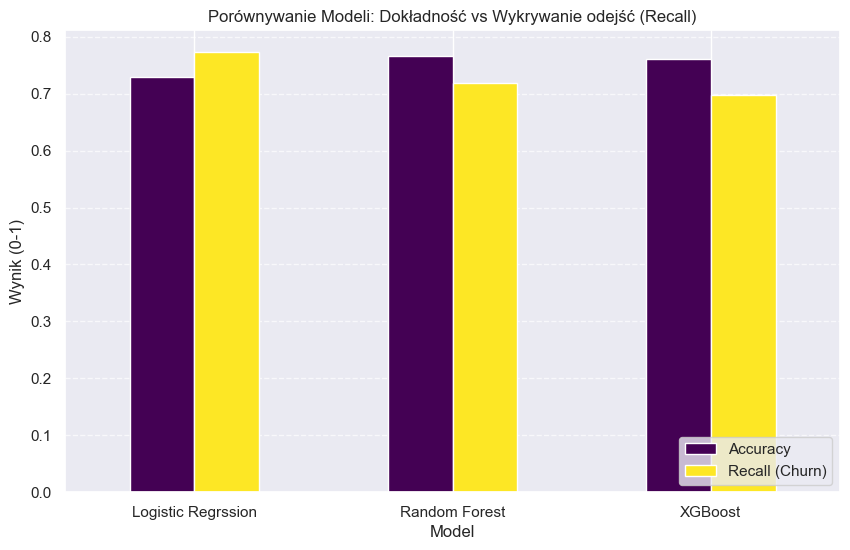

                Model  Accuracy  Recall (Churn)
0  Logistic Regrssion  0.729595        0.772727
1       Random Forest  0.765791        0.719251
2             XGBoost  0.761533        0.697861


In [145]:
from sklearn.metrics import recall_score, accuracy_score

models = ['Logistic Regrssion', 'Random Forest', 'XGBoost']
predictions = [y_pred_log, y_pred_rf, y_pred_xgb]

results = {
    'Model': models,
    'Accuracy': [accuracy_score(Y_test, p) for p in predictions],
    'Recall (Churn)': [recall_score(Y_test, p) for p in predictions] 
}

results_df = pd.DataFrame(results)

results_df.set_index('Model').plot(kind='bar', figsize=(10,6), colormap='viridis')
plt.title('Porównywanie Modeli: Dokładność vs Wykrywanie odejść (Recall)')
plt.ylabel('Wynik (0-1)')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(loc='lower right')
plt.show()

print(results_df)

# Strojenie Progu (Threshold Tuning)

In [146]:
from sklearn.metrics import precision_score, recall_score, f1_score

# 1. Pobieramy "surowe" prawdopodobieństwa (zamiast gotowych 0 i 1)
# model zwraca dwie liczby dla każdego klienta: [szansa_że_zostanie, szansa_że_odejdzie]
# Bierzemy drugą kolumnę ([:, 1])


y_proba = xgb_model.predict_proba(X_test)[:,1]

results = []

print(f"{'Próg':<10} {'Precision':<10} {'Recall':<10} {'F1-Score':<10}")

for threshold in np.arange(0.20, 0.65, 0.05):
    # Jeśli prawdopodobieństwo > threshold, to uznajemy, że Churn (1)
    preds_custom = (y_proba >= threshold).astype(int)
    
    prec = precision_score(Y_test, preds_custom)
    rec = recall_score(Y_test, preds_custom)
    f1 = f1_score(Y_test, preds_custom)
    
    results.append({'Threshold': threshold, 'Precision': prec, 'Recall': rec, 'F1': f1})
    print(f"{threshold:.2f}      {prec:.3f}      {rec:.3f}      {f1:.3f}")

# Zamieniamy na DataFrame dla wygody
df_results = pd.DataFrame(results)


Próg       Precision  Recall     F1-Score  
0.20      0.439      0.861      0.581
0.25      0.457      0.824      0.588
0.30      0.479      0.807      0.602
0.35      0.488      0.770      0.598
0.40      0.514      0.762      0.614
0.45      0.531      0.749      0.622
0.50      0.539      0.698      0.608
0.55      0.568      0.679      0.619
0.60      0.586      0.626      0.605


patrząc na wyniki wybieram prog 0.3 


# Macierz Pomyłek (Confusion Matrix)

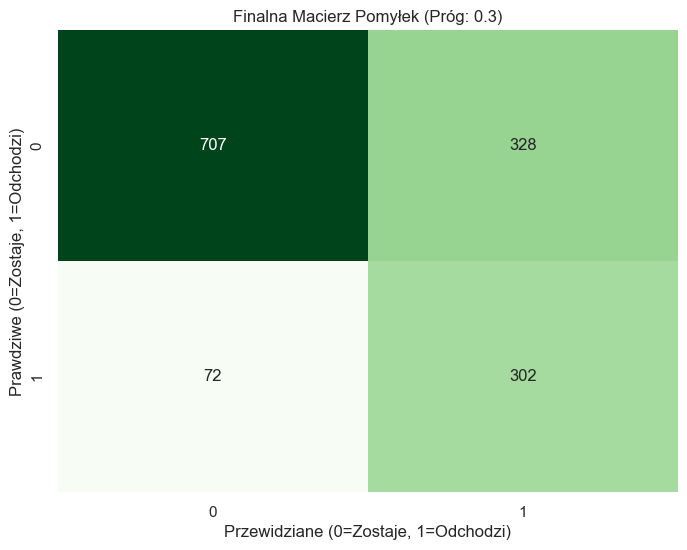

Wykryliśmy 302 z 374 uciekinierów.
Skuteczność (Recall): 80.75%


In [148]:
from sklearn.metrics import confusion_matrix

FINAL_THRESHOLD = 0.3

y_pred_final = (y_proba >= FINAL_THRESHOLD).astype(int)

cm = confusion_matrix(Y_test, y_pred_final)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', cbar=False)
plt.title(f'Finalna Macierz Pomyłek (Próg: {FINAL_THRESHOLD})')
plt.xlabel('Przewidziane (0=Zostaje, 1=Odchodzi)')
plt.ylabel('Prawdziwe (0=Zostaje, 1=Odchodzi)')
plt.show()

tp = cm[1, 1] 
fn = cm[1, 0]
print(f"Wykryliśmy {tp} z {tp+fn} uciekinierów.")
print(f"Skuteczność (Recall): {tp/(tp+fn):.2%}")